In [2]:
import pandas as pd
import numpy as np
from collections import Counter

import plotly.express as px

datasets = pd.read_excel("DatasetsSelecionados.xlsx")

# datasets = ['iris']

In [41]:
itens_unicos = {}
for dataset in datasets.Name.to_list():
    aux = defaultdict(set)
    for i in range(1, 11):
        try:
            test = pd.read_excel(f"../Keel XLSX/keelxlsx/datasets_discretized/{dataset}/{dataset}-{i}-test.xlsx")
            train = pd.read_excel(f"../Keel XLSX/keelxlsx/datasets_discretized/{dataset}/{dataset}-{i}-train.xlsx")
        except:
            test = pd.read_excel(f"../Keel XLSX/keelxlsx/datasets/{dataset}/{dataset}-{i}-test.xlsx")
            train = pd.read_excel(f"../Keel XLSX/keelxlsx/datasets/{dataset}/{dataset}-{i}-train.xlsx")
     
        for col in train.columns:       
            aux[col] = aux[col].union(set(train[col].unique()))
    tam = 0
    for _, values in aux.items():
        tam += len(values)
    
    itens_unicos[dataset] = tam

In [53]:
datasets

,Name,#Attributes (R/I/N),#Examples,#Classes,Miss Val.,Real,Integer,Nominal,Exemplos,NumAttributos,Itens Distintos
0,Breast,9 (0/0/9),277 (286),2,Yes,0,0,9,277,9,43
1,Car,6 (0/0/6),1728,4,No,0,0,6,1728,6,25
2,Flare,11 (0/0/11),1066,6,No,0,0,11,1066,11,47
3,Post-operative,8 (0/0/8),87 (90),3,Yes,0,0,8,87,8,26
4,Tic-tac-toe,9 (0/0/9),958,2,No,0,0,9,958,9,29
5,Appendicitis,7 (7/0/0),106,2,No,7,0,0,106,7,16
6,Balance,4 (4/0/0),625,3,No,4,0,0,625,4,15
7,Banana,2 (2/0/0),5300,2,No,2,0,0,5300,2,14
8,Ecoli,7 (7/0/0),336,8,No,7,0,0,336,7,31
9,Glass,9 (9/0/0),214,7,No,9,0,0,214,9,35


In [58]:
a = datasets[['Name','Exemplos','NumAttributos','Itens Distintos','#Classes']].sort_values(by='Name')
a.to_excel("DatasetsUtilizados.xlsx")

In [7]:
plot = []
plot_teste = []

for dataset in datasets.Name.to_list():
    count_treino = Counter()
    count_teste = Counter()
    
    
    for i in range(1, 11):
        treino = pd.read_excel(f"../CBAPlus/data/{dataset}/{dataset}-{i}-treino.xlsx")
        teste = pd.read_excel(f"../CBAPlus/data/{dataset}/{dataset}-{i}-teste.xlsx")
        
        count_treino += Counter(treino.iloc[:,-1])
        count_teste += Counter(teste.iloc[:,-1])
        
    count_medio = np.array(list(dict(count_treino).values()))/10

    aux = pd.DataFrame(count_medio, columns=['DistribuicaoPorClasse'])

    aux['Classes'] = list(range(len(aux)))
    aux['Dataset'] = dataset

    aux.DistribuicaoPorClasse = count_medio/count_medio.sum()*100

    plot.append(aux)
    
    
    count_medio_teste = np.array(list(dict(count_treino).values()))/10

    aux_teste = pd.DataFrame(count_medio_teste, columns=['DistribuicaoPorClasse'])

    aux_teste['Classes'] = list(range(len(aux_teste)))
    aux_teste['Dataset'] = dataset

    aux_teste.DistribuicaoPorClasse = count_medio_teste/count_medio_teste.sum()*100

    plot_teste.append(aux_teste)

FileNotFoundError: [Errno 2] No such file or directory: '../CBAPlus/data/banana/banana-1-treino.xlsx'

In [11]:
plot_df = pd.concat(plot)
plot_df_teste = pd.concat(plot_teste)

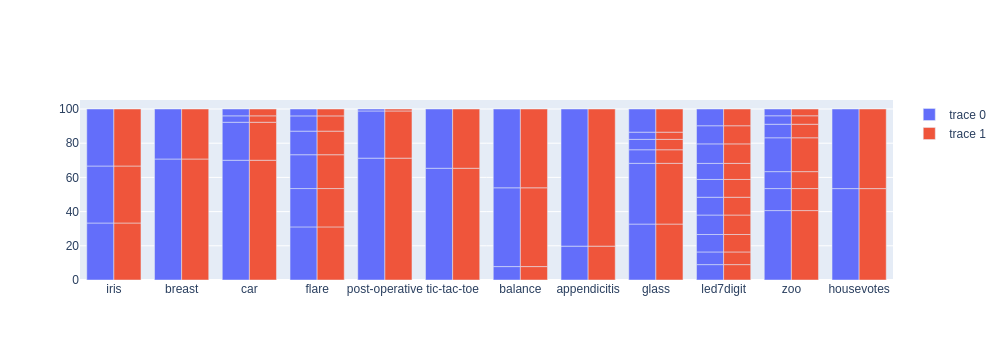

In [12]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=plot_df['Dataset'],
    y=plot_df.DistribuicaoPorClasse,
))


fig.add_trace(go.Bar(
    x=plot_df_teste['Dataset'],
    y=plot_df_teste.DistribuicaoPorClasse,
))